Data Set –  Wine
-	Refer to this link, https://archive.ics.uci.edu/ml/datasets/wine and read the description of the dataset and attach suitable headers.

In class Assignment Expectations/Steps -

Part 1: 

●	Load the data using Python Pandas library.

●	Do Exploratory Data Analysis of the data and state your insights.

Part 2: 

●	Exclude the target variable 

●	Perform Kmeans, Agglomerative clustering, PCA, build a classification model the clusters.

●	Evaluation of model and provide inferences.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
name = [ 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
        'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity','Hue',
        'OD280/OD315 of diluted wines','Proline'] 
df = pd.read_csv("wine.data",names=name )

In [3]:
df.reset_index(inplace=True)

In [32]:
df.shape

(178, 14)

There are 13 columns excluding the target variable and 173 rows

In [33]:
df.isnull().sum()

index                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

No null values are observed

In [34]:
df.describe()

,index,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The 5 point description for all the numerical values are as above

In [35]:
df.columns

Index(['index', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [5]:
df.rename(columns={'index':'class'},inplace=True)

In [37]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2    71
1    59
3    48
Name: class, dtype: int64


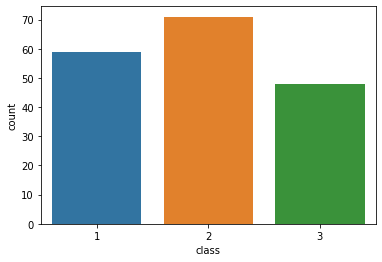

In [77]:
sns.countplot(x = df['class'])
print(df['class'].value_counts())
plt.show()

The maximum number of wines are of class 2

         Alcohol
class           
1      13.744746
2      12.278732
3      13.153750


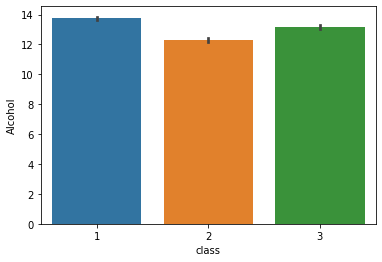

       Malic acid
class            
1        2.010678
2        1.932676
3        3.333750


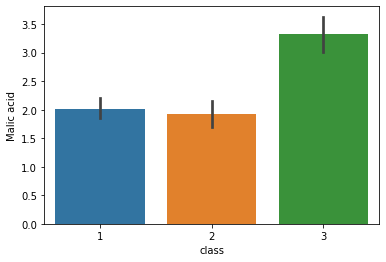

            Ash
class          
1      2.455593
2      2.244789
3      2.437083


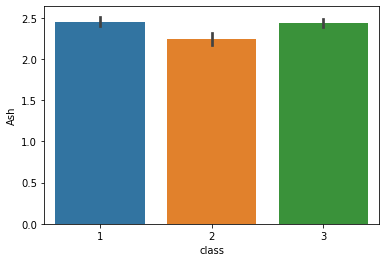

       Alcalinity of ash
class                   
1              17.037288
2              20.238028
3              21.416667


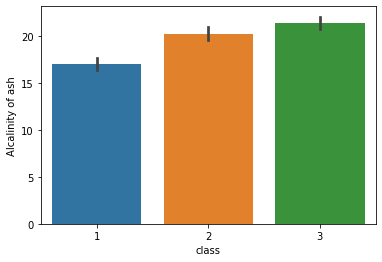

        Magnesium
class            
1      106.338983
2       94.549296
3       99.312500


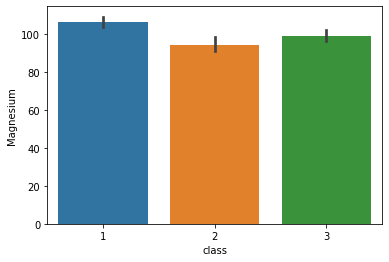

       Total phenols
class               
1           2.840169
2           2.258873
3           1.678750


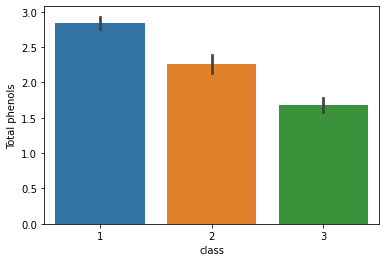

       Flavanoids
class            
1        2.982373
2        2.080845
3        0.781458


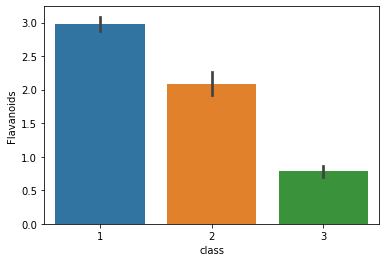

       Nonflavanoid phenols
class                      
1                  0.290000
2                  0.363662
3                  0.447500


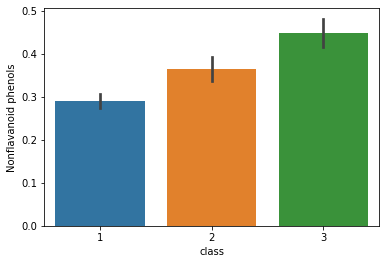

       Proanthocyanins
class                 
1             1.899322
2             1.630282
3             1.153542


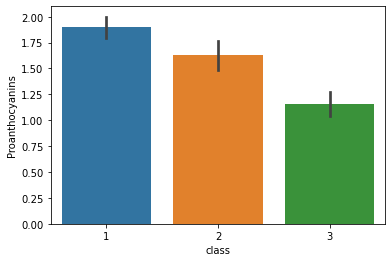

       Color intensity
class                 
1             5.528305
2             3.086620
3             7.396250


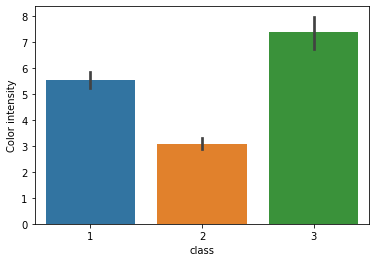

            Hue
class          
1      1.062034
2      1.056282
3      0.682708


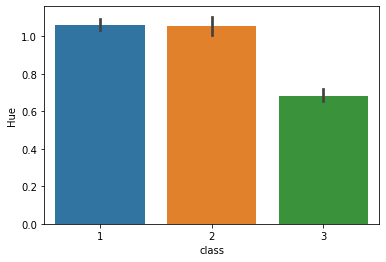

       OD280/OD315 of diluted wines
class                              
1                          3.157797
2                          2.785352
3                          1.683542


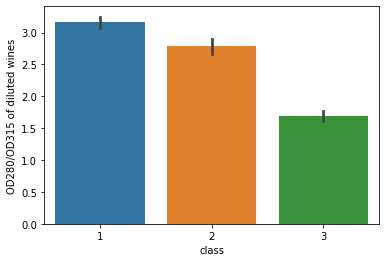

           Proline
class             
1      1115.711864
2       519.507042
3       629.895833


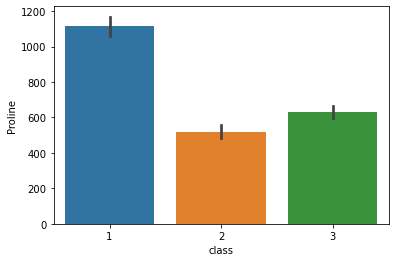

In [43]:
for i in df.drop(columns='class').columns:
    sns.barplot(x='class',y=i,data=df)
    print(df.groupby('class')[[i]].mean())
    plt.show()

The avg value of each feature with respect each group are as above.

In [6]:
y = df['class']
xp = df.drop(columns=['class'])

In [8]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

x = pd.DataFrame(pt.fit_transform(xp),columns=xp.columns)

In [50]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.530388,-0.435463,0.210464,-1.180400,1.690749,0.819950,1.027153,-0.609851,1.202701,0.451450,0.368811,2.037232,1.062541
1,0.238381,-0.338701,-0.839064,-2.663167,0.188126,0.591646,0.747647,-0.806373,-0.490487,-0.110974,0.412391,1.150327,1.029743
2,0.188751,0.318077,1.119290,-0.243437,0.261461,0.819950,1.192395,-0.421141,1.925646,0.467301,0.325202,0.779080,1.307868
3,1.708049,-0.121469,0.471827,-0.799464,1.020463,2.331036,1.419054,-1.011162,1.038972,1.182895,-0.420745,1.232761,1.810007
4,0.288052,0.523699,1.903702,0.472612,1.282104,0.819950,0.681647,0.342097,0.471707,-0.141340,0.368811,0.405810,0.188985


# Kmeans

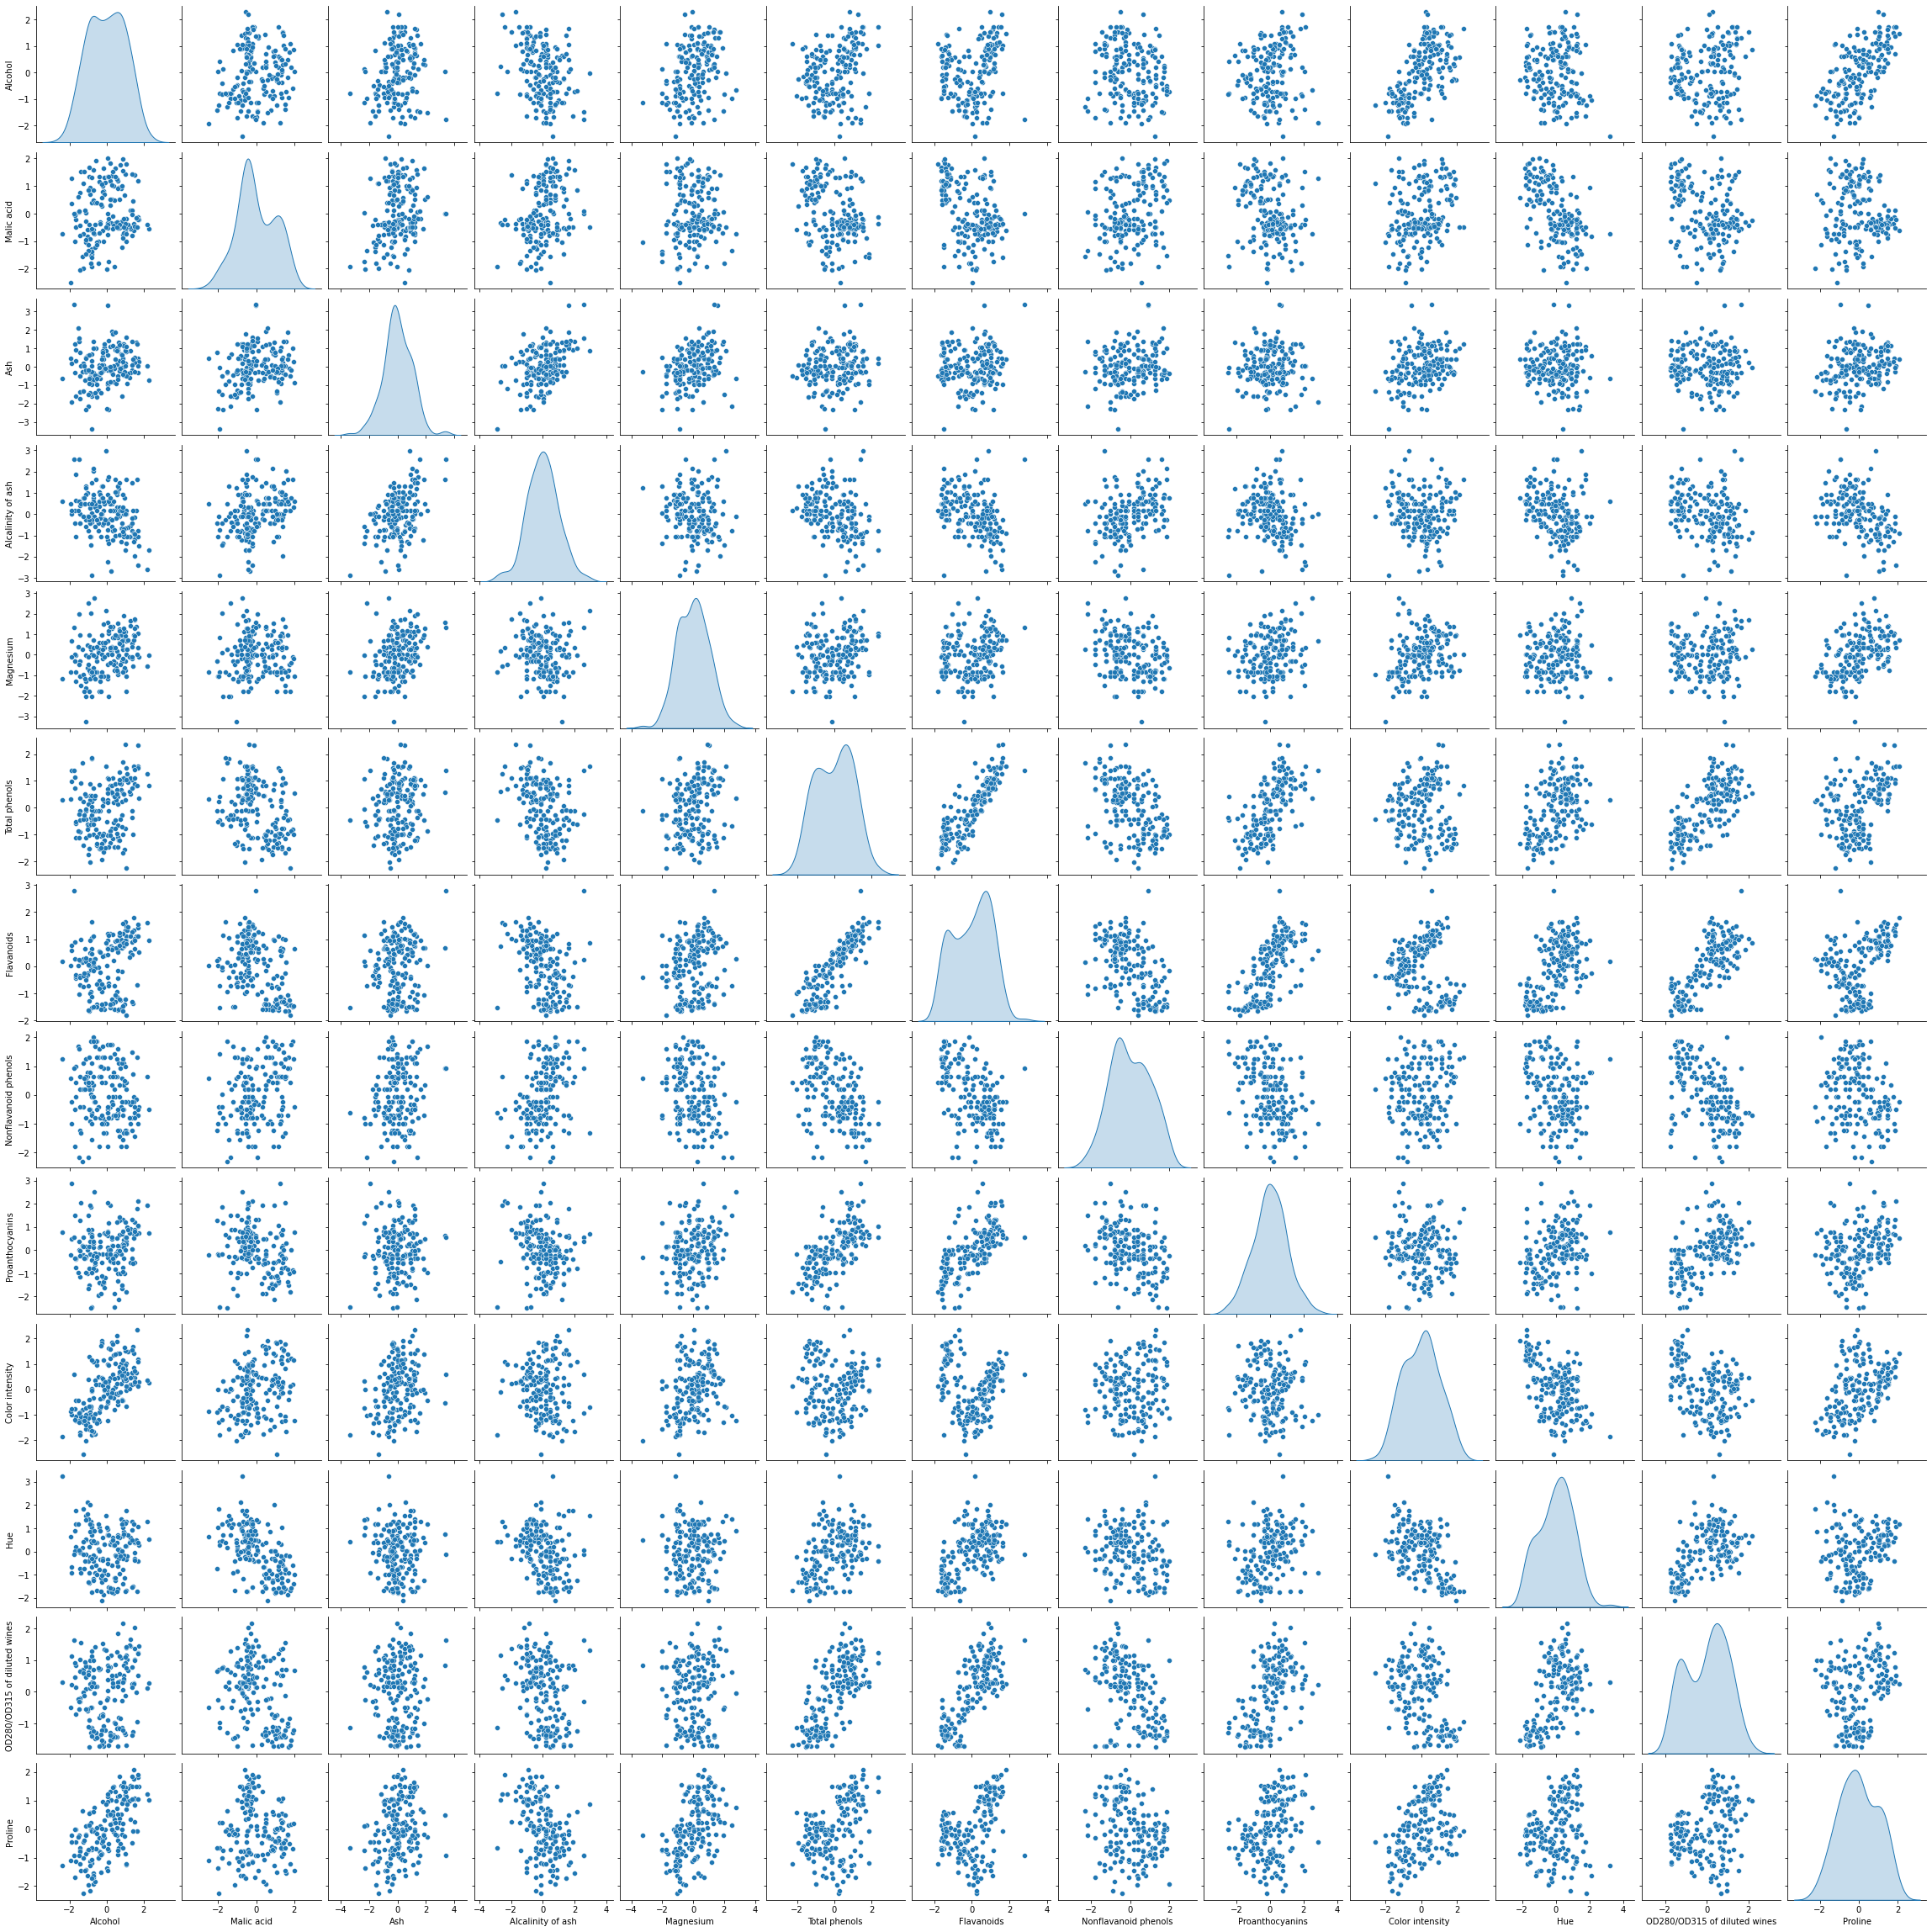

In [51]:
sns.pairplot(x,diag_kind='kde')

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cluster_range = np.arange(1,16)
cluster_error = []

for i in cluster_range:
    k = KMeans(n_clusters=i)
    k.fit(x)
    cluster_error.append(k.inertia_)
    
k_means = [KMeans(i,random_state=2).fit(x) for i in cluster_range]
sil_score = [silhouette_score(x,k.labels_) for k in k_means[1:]]

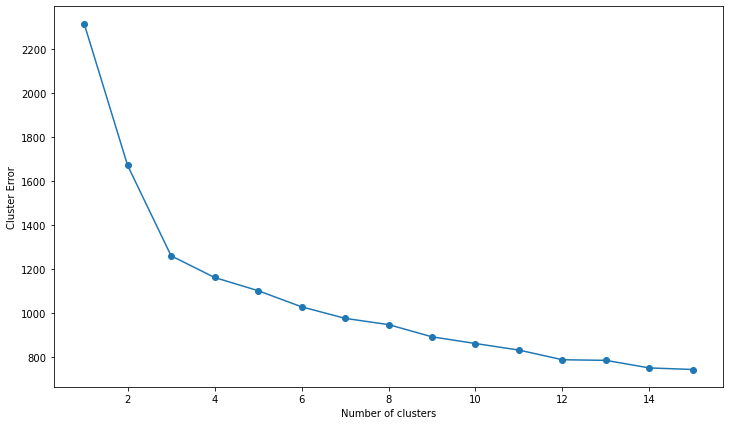

In [62]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range,cluster_error,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Error')
plt.show()

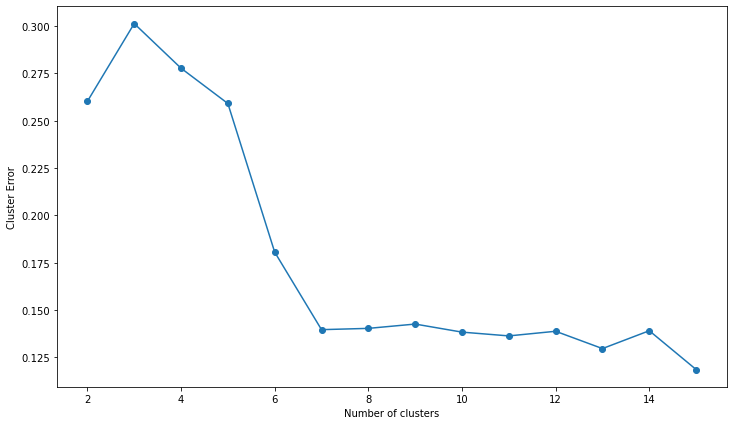

In [66]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(2,16),sil_score,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Error')
plt.show()

The highest average silhouette score is observed for three clusters, just as shown by the elbow plot.

In [72]:
k_final = KMeans(n_clusters=3,random_state=3)
k_final.fit(x)
labels = k_final.labels_

In [74]:
x['Class']= labels

In [75]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,1.530388,-0.435463,0.210464,-1.180400,1.690749,0.819950,1.027153,-0.609851,1.202701,0.451450,0.368811,2.037232,1.062541,0
1,0.238381,-0.338701,-0.839064,-2.663167,0.188126,0.591646,0.747647,-0.806373,-0.490487,-0.110974,0.412391,1.150327,1.029743,0
2,0.188751,0.318077,1.119290,-0.243437,0.261461,0.819950,1.192395,-0.421141,1.925646,0.467301,0.325202,0.779080,1.307868,0
3,1.708049,-0.121469,0.471827,-0.799464,1.020463,2.331036,1.419054,-1.011162,1.038972,1.182895,-0.420745,1.232761,1.810007,0
4,0.288052,0.523699,1.903702,0.472612,1.282104,0.819950,0.681647,0.342097,0.471707,-0.141340,0.368811,0.405810,0.188985,0


In [76]:
x['Class'].value_counts()

2    64
0    62
1    52
Name: Class, dtype: int64

# Agglomarative Clustering

In [79]:
x_a = pd.DataFrame(pt.fit_transform(xp),columns=xp.columns)

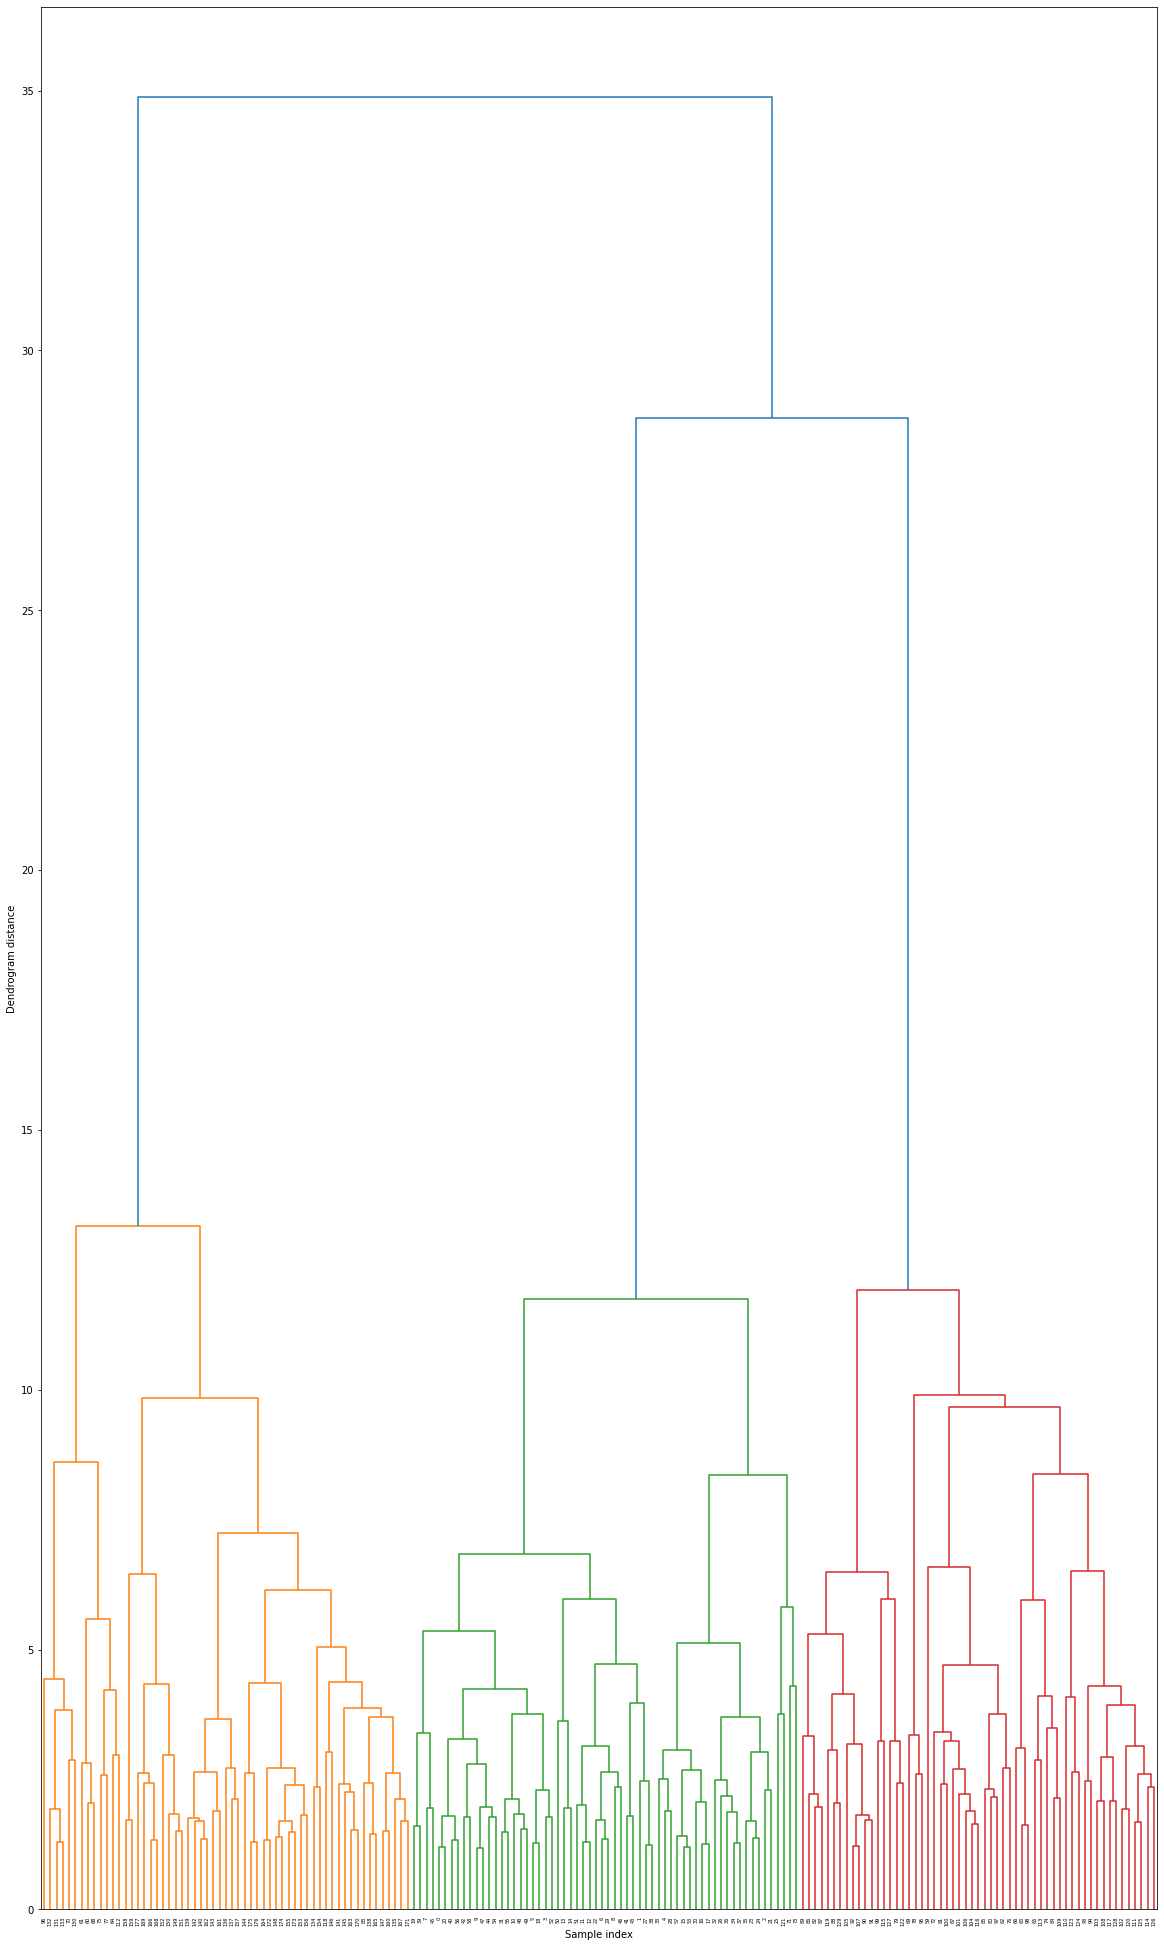

In [84]:
from scipy.cluster.hierarchy import linkage,dendrogram

plt.figure(figsize=(20,35))
plt.xlabel('Sample index')
plt.ylabel('Dendrogram distance')
z = linkage(x_a,'ward')
dendrogram(z,leaf_rotation=90,color_threshold=25,truncate_mode='level')
plt.show()

In [85]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agc.fit(x_a)

AgglomerativeClustering(n_clusters=3)

In [86]:
x_a['Class']=agc.labels_

In [87]:
x_a['Class'].value_counts()

2    62
0    59
1    57
Name: Class, dtype: int64

# PCA

In [32]:
x_p = pd.DataFrame(pt.fit_transform(xp),columns=xp.columns)

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
x_transformed = pca.fit_transform(x_p)

In [34]:
pca.components_

array([[-0.15298815,  0.22325282, -0.00249122,  0.24571233, -0.14614977,
        -0.40421188, -0.43011977,  0.30058631, -0.32600772,  0.04883817,
        -0.29633376, -0.37873121, -0.25759013],
       [-0.45476476, -0.26665543, -0.30182916,  0.01887899, -0.34184461,
        -0.03706904,  0.02742526, -0.02576553, -0.00834422, -0.52282794,
         0.26564624,  0.15084933, -0.379785  ],
       [-0.19404836,  0.16656644,  0.61508905,  0.60110552,  0.10105442,
         0.15405395,  0.15870503,  0.15846746,  0.18756579, -0.14564323,
         0.05836363,  0.17530458, -0.14199911],
       [ 0.00742656,  0.52092766, -0.27450202,  0.03395941, -0.27474899,
         0.12175982,  0.11087775, -0.28560076,  0.37493527,  0.05144446,
        -0.48526922,  0.17805236, -0.23976788],
       [-0.30308899, -0.00751511, -0.06005818,  0.07519356,  0.68386298,
        -0.16894046, -0.10784785, -0.58633401, -0.03802376, -0.12666374,
        -0.11509799, -0.09210617, -0.08927899],
       [-0.16039822, -0.592714

In [35]:
pca.explained_variance_

array([4.58785399, 2.74596918, 1.48601054, 0.91151485, 0.80917369,
       0.59963916, 0.51709263, 0.36353423, 0.31189094, 0.2500397 ,
       0.22252162, 0.16659966, 0.10160612])

In [44]:
np.sum(pca.explained_variance_ratio_[0:9])

0.9433380393974758

we see 8 features explain 91.94% of the variance

In [65]:
pca = PCA(n_components=9)

In [66]:
x_tr = pca.fit_transform(x_p)

In [67]:
x_tr = pd.DataFrame(x_tr,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pc9'])
x_tr.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pc9
0,-3.350156,-1.474457,-0.198431,0.013188,0.274681,-0.352221,0.454845,0.088320,0.364678
1,-2.263615,0.094033,-2.114921,-0.133045,-0.011339,-1.147916,0.099525,0.893737,-0.682022
2,-2.362854,-1.142488,1.096692,0.545426,-0.344877,0.319163,0.558113,-0.484957,-0.828938
3,-3.581107,-2.512494,-0.057693,0.682417,-0.277391,0.167650,-0.379155,0.584629,-0.145210
4,-0.997288,-1.137732,2.079533,-0.488557,0.197394,-0.415051,0.451463,0.439872,0.235713


# Classification using the above data

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split

x_train_org,xtest_org,ytrain,ytest = train_test_split(x_p,y,test_size=0.3,random_state=2)
x_train_pca_full,xtest_pca_full,ytrain,ytest = train_test_split(x_transformed,y,test_size=0.3,random_state=2)
x_train_pca_selected,xtest_pca_selected,ytrain,ytest = train_test_split(x_tr,y,test_size=0.3,random_state=2)

lr = LogisticRegression()

cv = cross_val_score(lr,x_transformed,y,cv=5,scoring='f1_weighted')
cv_org = cross_val_score(lr,x_p,y,cv=5,scoring='f1_weighted')
cv_selected = cross_val_score(lr,x_tr,y,cv=5,scoring='f1_weighted')

In [52]:
cv_org

array([0.97236919, 0.94352462, 1.        , 1.        , 1.        ])

In [51]:
cv

array([0.97236919, 0.94352462, 1.        , 1.        , 1.        ])

In [69]:
cv_selected

array([0.94483294, 0.94352462, 1.        , 1.        , 1.        ])

In [73]:
print('Avg f1 score of Logistic model with original data = ',np.mean(cv_org))
print('Avg f1 score of Logistic model with all pca components = ',np.mean(cv))
print('Avg f1 score of Logistic model with only 9 pca components = ',np.mean(cv_selected))

Avg f1 score of Logistic model with original data =  0.9831787636232081
Avg f1 score of Logistic model with all pca components =  0.9831787636232081
Avg f1 score of Logistic model with only 9 pca components =  0.9776715136715136
